In [1]:
import transportation_tutorials as tt
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
total_florida_vmt = pd.Series({
    2003: 508_607_851,
    2004: 537_494_319,
    2005: 550_614_540,
    2006: 558_308_386,
    2007: 562_798_032,
    2008: 542_334_376,
    2009: 538_088_986,
    2010: 536_315_479,
    2011: 525_630_013,
    2012: 522_879_155,
    2013: 527_950_180,
    2014: 550_795_629,
    2015: 566_360_175,
    2016: 588_062_806,
    2017: 599_522_329,
})

Text(0.5, 0, 'year')

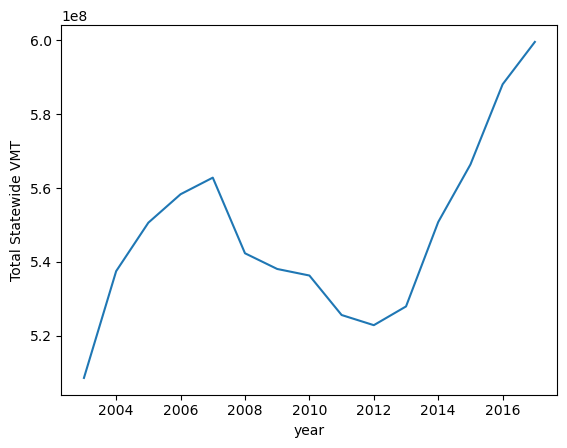

In [5]:
plt.plot(total_florida_vmt)
plt.ylabel("Total Statewide VMT");
plt.xlabel("year")

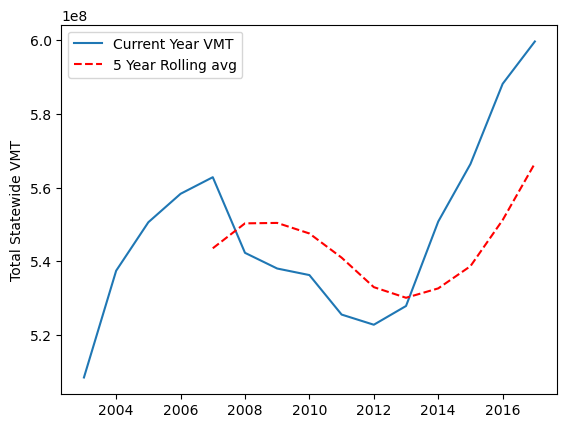

In [6]:
plt.plot(total_florida_vmt, label='Current Year VMT')
plt.plot(total_florida_vmt.rolling(5).mean(), 'r--', label='5 Year Rolling avg')
plt.ylabel("Total Statewide VMT")
plt.legend();

/var/folders/2x/jsjly82j6039nhcnzctn50kh0000gn/T/ipykernel_1330/2505625401.py:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('a','b');


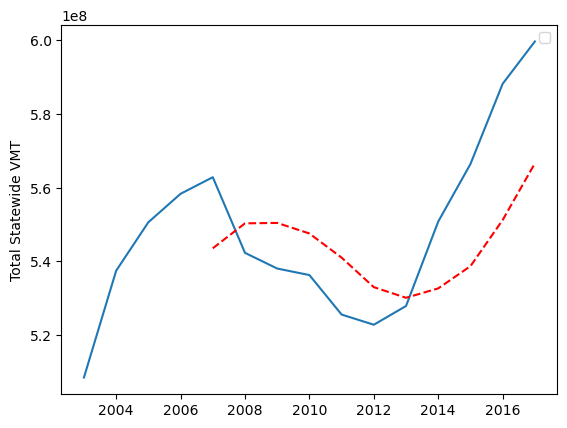

In [7]:
plt.plot(total_florida_vmt, label='Current Year VMT')
plt.plot(total_florida_vmt.rolling(5).mean(), 'r--', label='5 Year Rolling avg')
plt.ylabel("Total Statewide VMT")
plt.legend('a','b');

In [8]:
hh = pd.read_csv(tt.data('SERPM8-BASE2015-HOUSEHOLDS'), index_col=0)
persons = pd.read_csv(tt.data('SERPM8-BASE2015-PERSONS'), index_col=0)
trips = pd.read_csv(tt.data('SERPM8-BASE2015-TRIPS'), index_col=0)

In [9]:
# Add household income to persons
persons = persons.merge(hh.income, left_on='hh_id', right_on=hh.hh_id)

# Count of persons per HH
hh = hh.merge(
    persons.groupby('hh_id').size().rename('hhsize'),
    left_on=['hh_id'],
    right_index=True,
)

# Count of trips per HH
hh = hh.merge(
    trips.groupby(['hh_id']).size().rename('n_trips'),
    left_on=['hh_id'],
    right_index=True,
)

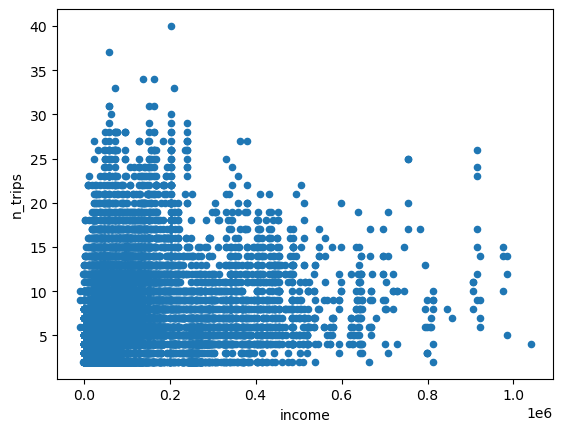

In [10]:
hh.plot(kind='scatter', x='income', y='n_trips');

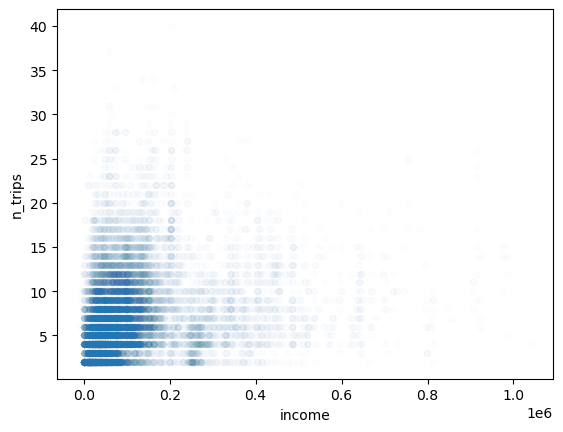

In [11]:
hh.plot(kind='scatter', x='income', y='n_trips', alpha=0.01);

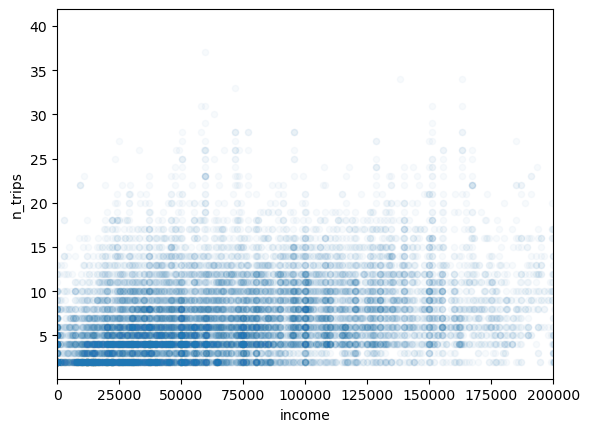

In [12]:
ax = hh.plot(kind='scatter', x='income', y='n_trips', alpha=0.03)
ax.set_xlim(0,200_000);

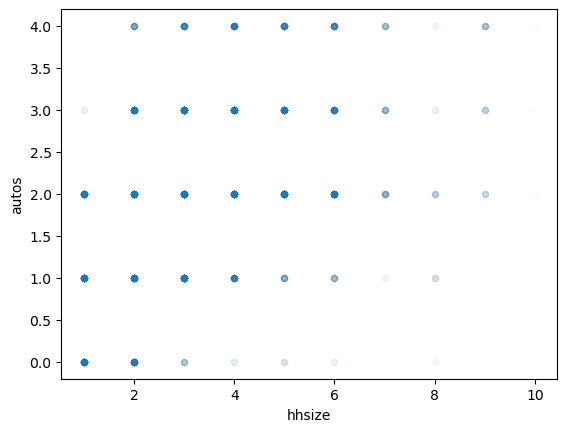

In [13]:
hh.plot(kind='scatter', x='hhsize', y='autos', alpha=0.01);

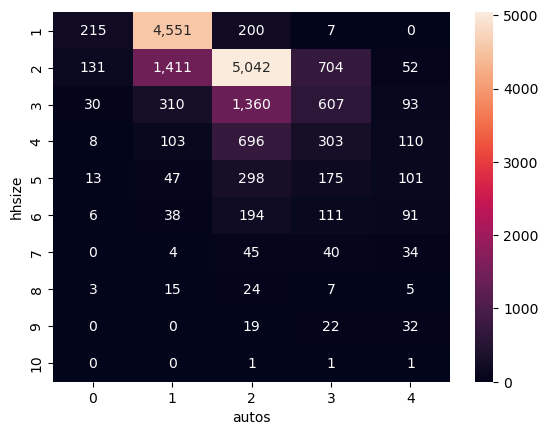

In [14]:
sns.heatmap(
    hh.pivot_table(
        index='hhsize',
        columns='autos',
        aggfunc='size'
    ).fillna(0),
    annot=True,
    fmt=",.0f"
);

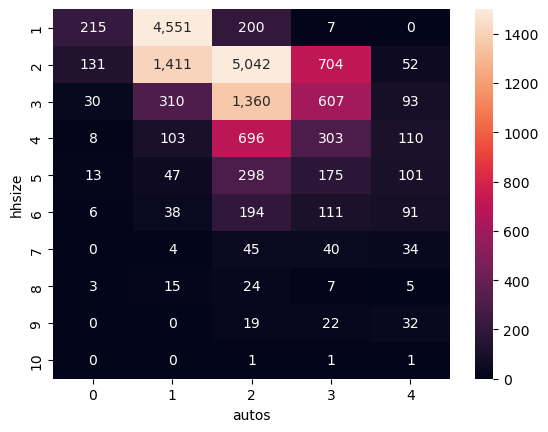

In [15]:
sns.heatmap(
    hh.pivot_table(
        index='hhsize',
        columns='autos',
        aggfunc='size'
    ).fillna(0),
    annot=True,
    fmt=",.0f",
    vmax=1500,
);

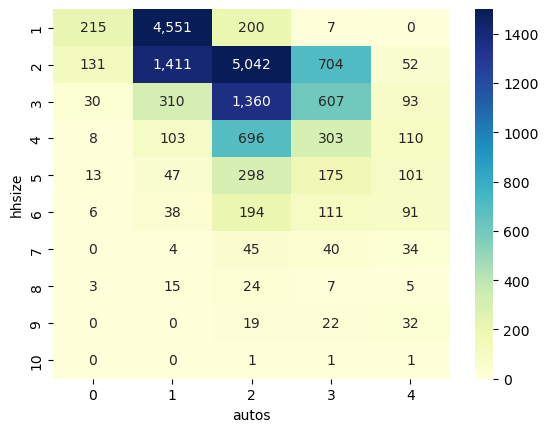

In [16]:
sns.heatmap(
    hh.pivot_table(
        index='hhsize',
        columns='autos',
        aggfunc='size'
    ).fillna(0),
    annot=True,
    fmt=",.0f",
    vmax=1500,
    cmap="YlGnBu",
);

In [17]:
hh['hhsize5'] = np.fmin(hh['hhsize'], 5)

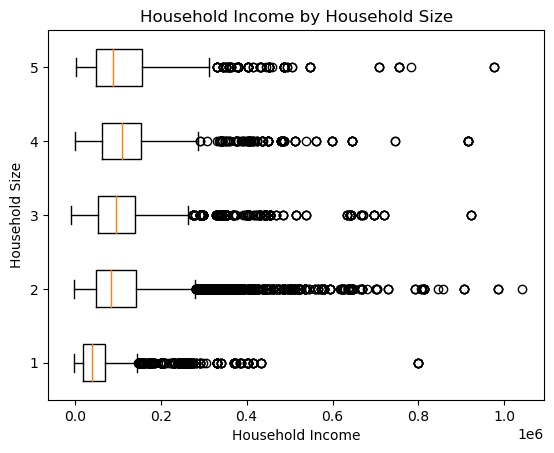

In [18]:
data = list(hh.groupby('hhsize5').income)
plt.boxplot(
    [i[1] for i in data],
    vert=False,
    labels=[i[0] for i in data],
)
plt.title('Household Income by Household Size')
plt.xlabel('Household Income')
plt.ylabel('Household Size');

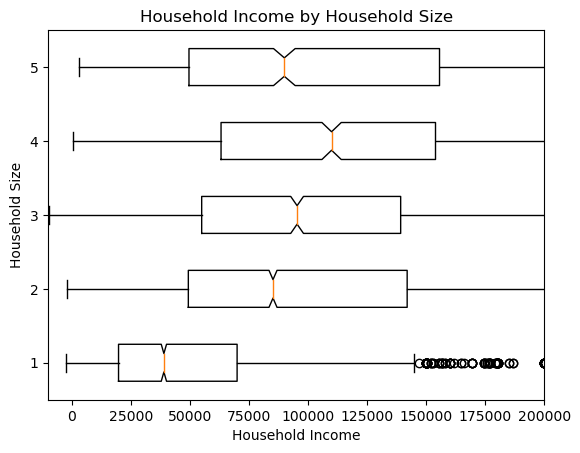

In [19]:
plt.boxplot(
    [i[1] for i in data],
    vert=False,
    labels=[i[0] for i in data],
    notch=True,
)
plt.title('Household Income by Household Size')
plt.xlim(-10_000,200_000)
plt.xlabel('Household Income')
plt.ylabel('Household Size');

In [20]:
# sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# # Initialize the FacetGrid object
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(
#     hh[hh.income<=300_000], row="hhsize5", hue="hhsize5",
#     aspect=7, height=1.25, palette=pal,
#     xlim=(-95000,300000)
# )

# # Draw the densities in a few steps
# g.map(sns.kdeplot, "income", clip_on=False, shade=True, alpha=1, lw=1.5, bw=5000)
# g.map(sns.kdeplot, "income", clip_on=False, color="w", lw=4, bw=5000)
# g.map(plt.axhline, y=0, lw=2, clip_on=False)

# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .15, f'{label} Persons', fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)

# g.map(label, "income")

# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-0.625)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[],
#       xticks=[       0,50_000,100_000,150_000,200_000,300_000],
#       xticklabels=['0','50K' ,'100K' ,'150K' ,'200K'  ,'300K',],
#      )
# g.despine(bottom=True, left=True);
# g.row_names = [f'HH Size {i}' for i in g.row_names]

/Users/hyunhwakim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=5000`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(*plot_args, **plot_kwargs)
/Users/hyunhwakim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/hyunhwakim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=5000`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(*plot_args, **plot_kwargs)
/Users/hyunhwakim/anaconda3/lib/py

ValueError: Image size of 3835978x588 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 875x625 with 5 Axes>

In [22]:
trips = pd.read_csv(tt.data('SERPM8-BASE2015-TRIPS'))
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123874 entries, 0 to 123873
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   hh_id            123874 non-null  int64  
 1   person_id        123874 non-null  int64  
 2   person_num       123874 non-null  int64  
 3   tour_id          123874 non-null  int64  
 4   stop_id          123874 non-null  int64  
 5   inbound          123874 non-null  int64  
 6   tour_purpose     123874 non-null  object 
 7   orig_purpose     123874 non-null  object 
 8   dest_purpose     123874 non-null  object 
 9   orig_mgra        123874 non-null  int64  
 10  dest_mgra        123874 non-null  int64  
 11  parking_mgra     123874 non-null  int64  
 12  stop_period      123874 non-null  int64  
 13  trip_mode        123874 non-null  int64  
 14  trip_board_tap   123874 non-null  int64  
 15  trip_alight_tap  123874 non-null  int64  
 16  tour_mode        123874 non-null  int6

In [23]:
trip_mode_counts = trips.trip_mode.value_counts(sort=False)
trip_mode_counts

trip_mode
6       872
3     19264
1     77187
4      1348
10     1563
20     2947
5     10355
9      3290
2      6659
11      330
14        6
15       16
19       18
16        5
17        9
18        5
Name: count, dtype: int64

In [24]:
trip_mode_dictionary = {
    1: "DRIVEALONEFREE",
    2: "DRIVEALONEPAY",
    3: "SHARED2GP",
    4: "SHARED2PAY",
    5: "SHARED3GP",
    6: "SHARED3PAY",
    7: "TNCALONE",
    8: "TNCSHARED",
    9: "WALK",
    10: "BIKE",
    11: "WALK_MIX",
    12: "WALK_PRMW",
    13: "WALK_PRMD",
    14: "PNR_MIX",
    15: "PNR_PRMW",
    16: "PNR_PRMD",
    17: "KNR_MIX",
    18: "KNR_PRMW",
    19: "KNR_PRMD",
    20: "SCHBUS",
}

In [25]:
trip_mode_counts.index = trip_mode_counts.index.map(trip_mode_dictionary)
trip_mode_counts

trip_mode
SHARED3PAY          872
SHARED2GP         19264
DRIVEALONEFREE    77187
SHARED2PAY         1348
BIKE               1563
SCHBUS             2947
SHARED3GP         10355
WALK               3290
DRIVEALONEPAY      6659
WALK_MIX            330
PNR_MIX               6
PNR_PRMW             16
KNR_PRMD             18
PNR_PRMD              5
KNR_MIX               9
KNR_PRMW              5
Name: count, dtype: int64

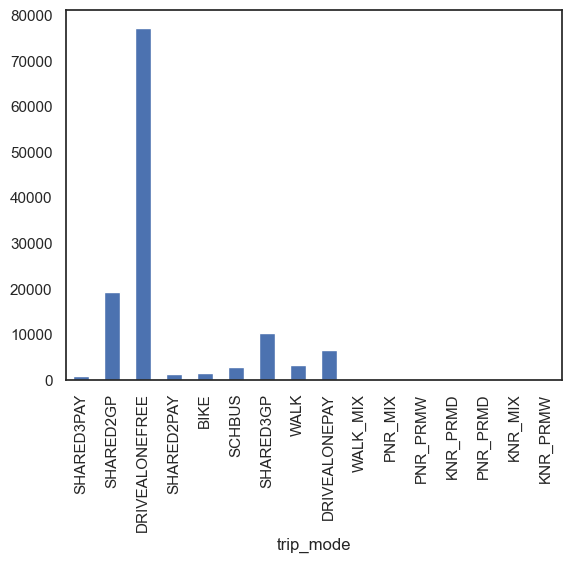

In [26]:
trip_mode_counts.plot(kind='bar');

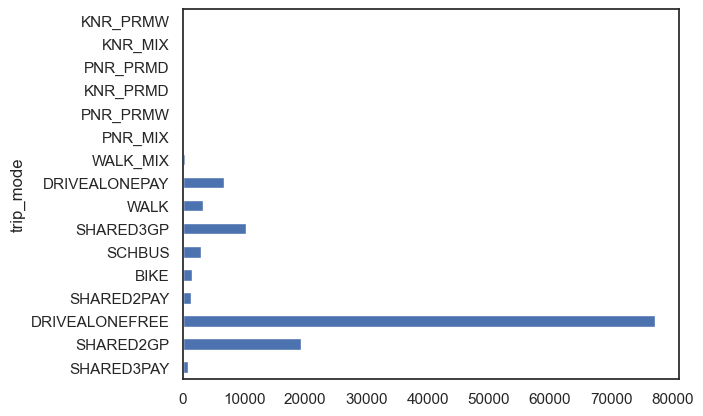

In [27]:
trip_mode_counts.plot(kind='barh');

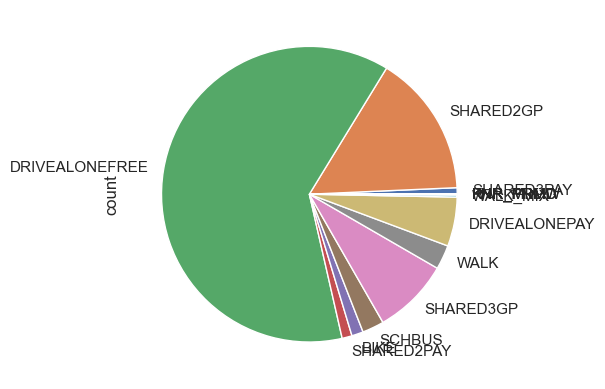

In [28]:
trip_mode_counts.plot(kind='pie');

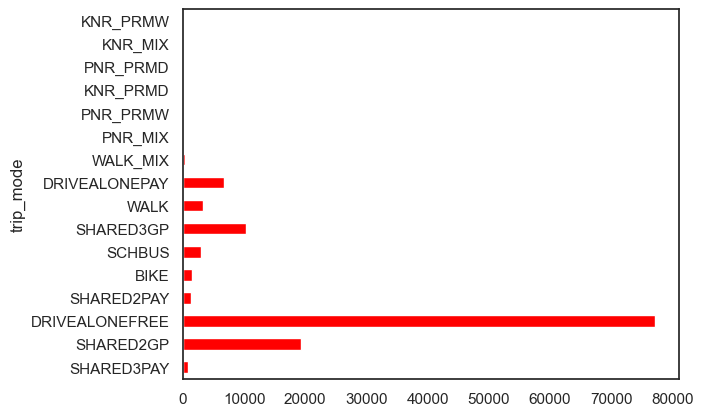

In [29]:
trip_mode_counts.plot(kind='barh', color='red');

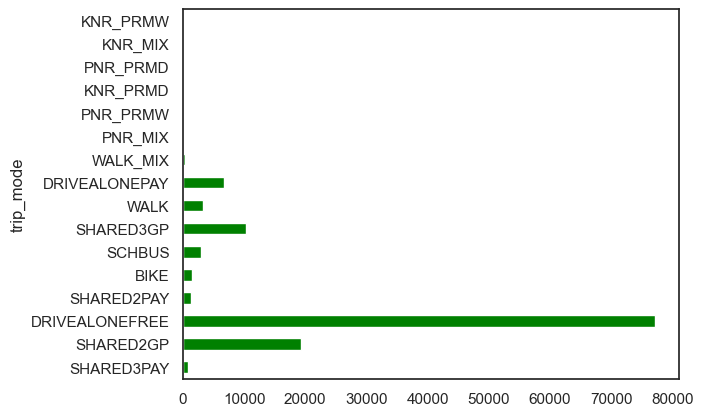

In [30]:
trip_mode_counts.plot(kind='barh', color='green');

Axes.pie() got an unexpected keyword argument 'color'


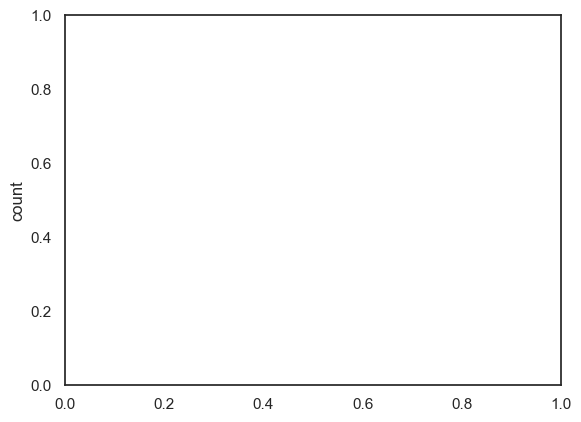

In [31]:
try:
    trip_mode_counts.plot(kind='pie', color='red')
except TypeError as err:
    print(err)

/var/folders/2x/jsjly82j6039nhcnzctn50kh0000gn/T/ipykernel_1330/4029698456.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{i:,.0f}" for i in ax.get_yticks()])


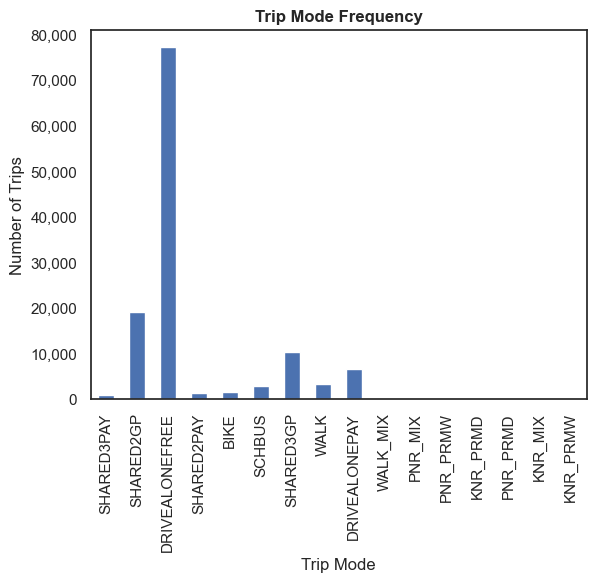

In [32]:
ax = trip_mode_counts.plot(kind='bar')
ax.set_title("Trip Mode Frequency", fontweight='bold')
ax.set_xlabel("Trip Mode")
ax.set_ylabel("Number of Trips");
ax.set_yticklabels([f"{i:,.0f}" for i in ax.get_yticks()])
ax.set_yticks([5000,15000,25000,35000], minor=True);

In [33]:
tm = {11,12,13,14,15,16,17,18,19}
trip_mode_dictionary[21] = 'TRANSIT'
trip_mode_counts = trips.trip_mode.map(lambda x: 21 if x in tm else x).value_counts(sort=False)
trip_mode_counts.index = trip_mode_counts.index.map(trip_mode_dictionary)
trip_mode_counts

trip_mode
SHARED3PAY          872
SHARED2GP         19264
DRIVEALONEFREE    77187
SHARED2PAY         1348
BIKE               1563
SCHBUS             2947
SHARED3GP         10355
WALK               3290
DRIVEALONEPAY      6659
TRANSIT             389
Name: count, dtype: int64

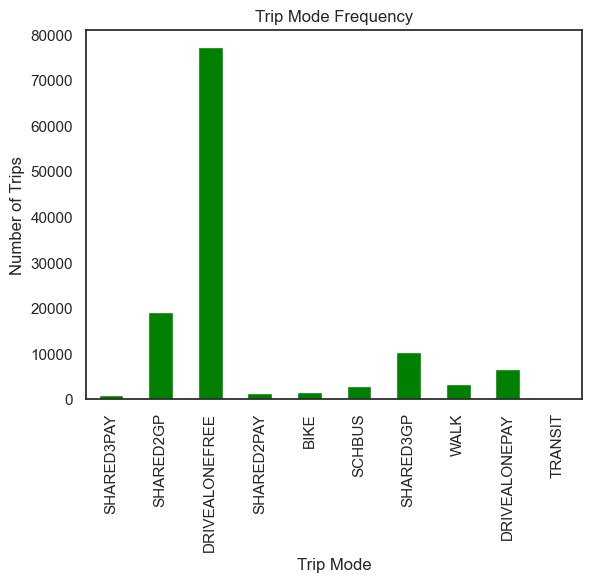

In [34]:
ax = trip_mode_counts.plot(kind='bar', color='green')
ax.set_title("Trip Mode Frequency")
ax.set_xlabel("Trip Mode")
ax.set_ylabel("Number of Trips");

In [36]:
hh = pd.read_csv(tt.data('SERPM8-BASE2015-HOUSEHOLDS'), index_col=0)
hh.set_index('hh_id', inplace=True)
hh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18178 entries, 1690841 to 1726370
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   home_mgra     18178 non-null  int64 
 1   income        18178 non-null  int64 
 2   autos         18178 non-null  int64 
 3   transponder   18178 non-null  int64 
 4   cdap_pattern  18178 non-null  object
 5   jtf_choice    18178 non-null  int64 
 6   autotech      18178 non-null  int64 
 7   tncmemb       18178 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.2+ MB


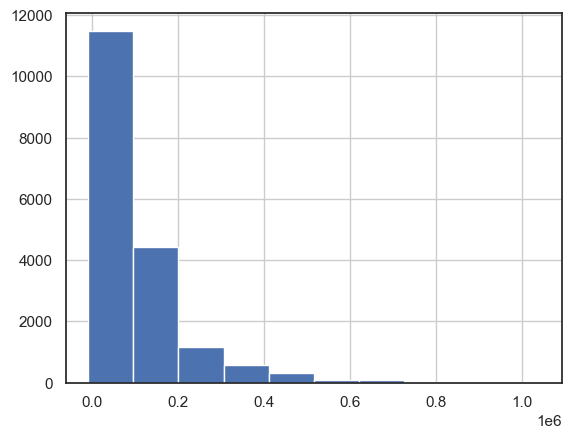

In [37]:
hh.income.hist();

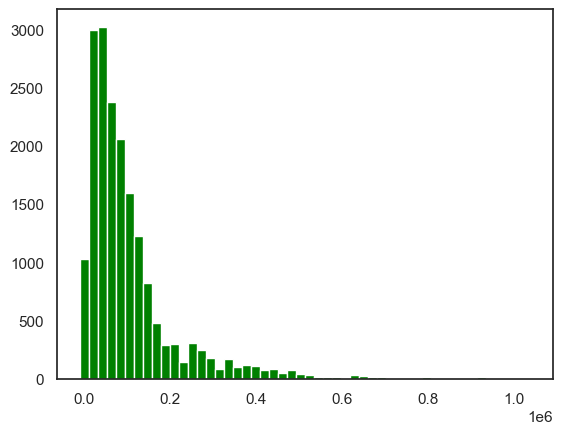

In [38]:
hh.income.hist(bins=50, grid=False, color='green');

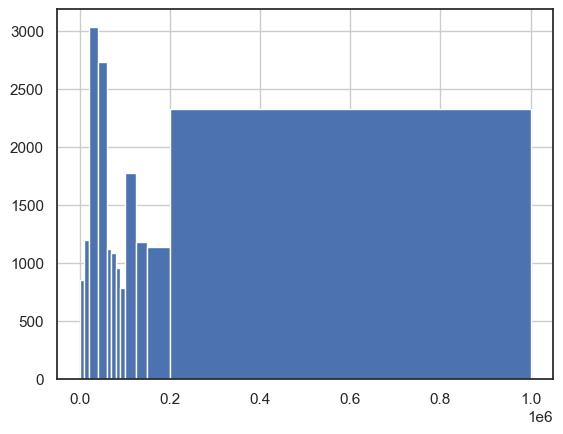

In [39]:
bins = np.array([0,10,20,40,60,70,80,90,100,125,150,200,1000]) * 1000
hh.income.hist(bins=bins);

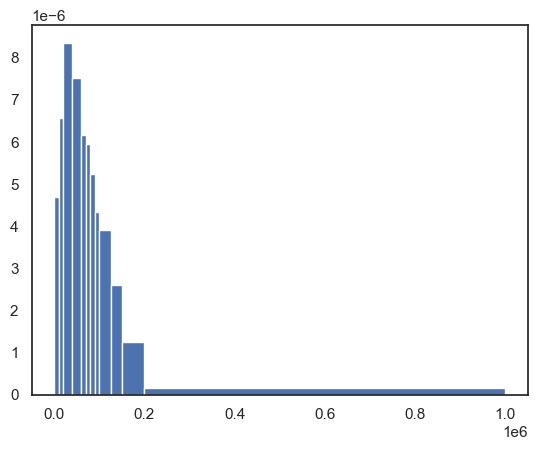

In [40]:
fig, ax = plt.subplots()
ax.hist(hh.income, bins=bins, density=True);

/var/folders/2x/jsjly82j6039nhcnzctn50kh0000gn/T/ipykernel_1330/3093547840.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"${i/1000:.0f}K" for i in ax.get_xticks()]);


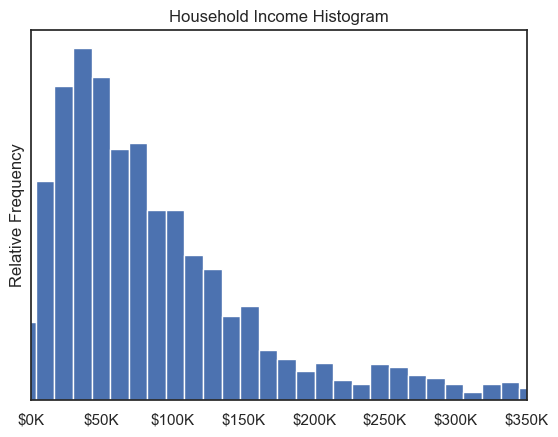

In [41]:
ax = hh.income.hist(grid=False, bins=80)
ax.set_xlim(0,350_000)
ax.set_title("Household Income Histogram");
ax.set_xticklabels([f"${i/1000:.0f}K" for i in ax.get_xticks()]);
ax.set_ylabel("Relative Frequency");
ax.set_yticks([]);